<a href="https://colab.research.google.com/github/archie-cm/Customer-Personality-Analysis-Segmentation/blob/main/Customer_Personality_Analysis_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1
- Melakukan feature engineering: conversion rate
- Menghitung dan mengelompokkan 'umur' menjadi ke beberapa kelompok
- Buatlah plot yang dapat menunjukkan hubungan antara conversion rate dan jenis user yang berpotensi lebih besar untuk merespon campaign
- Interpretasi plot tersebut dan perhatikan, Apakah terdapat hubungan yang signifikan antara umur customer dengan conversion rate

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mini project/Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning/marketing_campaign_data.csv')
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,"58,138,000.00",0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,"46,344,000.00",1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,"71,613,000.00",0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,"26,646,000.00",1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,"58,293,000.00",1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,"61,223,000.00",0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,S3,Bertunangan,"64,014,000.00",2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,S1,Cerai,"56,981,000.00",0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,S2,Bertunangan,"69,245,000.00",0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

## Feature Engineering

In [ ]:
# convert string to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['age'] = 2022 - df['Year_Birth']
df['join_at_age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['total_kids'] = df['Kidhome'] + df['Teenhome']
df['is_parent'] = np.where(df['total_kids']> 0, 1, 0)

In [ ]:
#age_range
df['age_range'] = pd.qcut(df['age'],5, labels=['child','teens','young_adults','middle_adults','older_adults'])
df['age_range']

0       middle_adults
1        older_adults
2       middle_adults
3               child
4               child
            ...      
2235     young_adults
2236     older_adults
2237            child
2238     older_adults
2239     older_adults
Name: age_range, Length: 2240, dtype: category
Categories (5, object): ['child' < 'teens' < 'young_adults' < 'middle_adults' < 'older_adults']

In [ ]:
# amount spent
df['total_amount_spent'] = df['MntCoke'] + df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + df ['MntMeatProducts'] + df['MntSweetProducts']
df['total_amount_spent']

0       1617000
1         27000
2        776000
3         53000
4        422000
         ...   
2235    1341000
2236     444000
2237    1241000
2238     843000
2239     172000
Name: total_amount_spent, Length: 2240, dtype: int64

In [ ]:
# acceped campaigns
df['total_accepted_campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['total_accepted_campaign']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    0
Name: total_accepted_campaign, Length: 2240, dtype: int64

In [ ]:
# total transaction
df['total_transaction'] = df['NumCatalogPurchases'] + df['NumDealsPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']
df['total_transaction']

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: total_transaction, Length: 2240, dtype: int64

In [ ]:
df['conversion_rate'] = df['total_transaction'] / df['NumWebVisitsMonth']
df['conversion_rate']

0      3.57
1      1.20
2      5.25
3      1.33
4      3.80
       ... 
2235   3.60
2236   3.14
2237   3.17
2238   7.67
2239   1.57
Name: conversion_rate, Length: 2240, dtype: float64

In [ ]:
df['conversion_rate'].sort_values(ascending=False)

975     inf
1773    inf
905     inf
1955    inf
1910    inf
       ... 
774    0.05
1524   0.00
981    0.00
655     NaN
2132    NaN
Name: conversion_rate, Length: 2240, dtype: float64

In [ ]:
df['conversion_rate'].replace([np.inf, np.nan], 0, inplace = True)

## EDA

In [ ]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,"2,240.00","1,119.50",646.78,0.00,559.75,"1,119.50","1,679.25","2,239.00"
ID,"2,240.00","5,592.16","3,246.66",0.00,"2,828.25","5,458.50","8,427.75","11,191.00"
Year_Birth,"2,240.00","1,968.81",11.98,"1,893.00","1,959.00","1,970.00","1,977.00","1,996.00"
Income,"2,216.00","52,247,251.35","25,173,076.66","1,730,000.00","35,303,000.00","51,381,500.00","68,522,000.00","666,666,000.00"
Kidhome,"2,240.00",0.44,0.54,0.00,0.00,0.00,1.00,2.00
Teenhome,"2,240.00",0.51,0.54,0.00,0.00,0.00,1.00,2.00
Recency,"2,240.00",49.11,28.96,0.00,24.00,49.00,74.00,99.00
MntCoke,"2,240.00","303,935.71","336,597.39",0.00,"23,750.00","173,500.00","504,250.00","1,493,000.00"
MntFruits,"2,240.00","26,302.23","39,773.43",0.00,"1,000.00","8,000.00","33,000.00","199,000.00"
MntMeatProducts,"2,240.00","166,950.00","225,715.37",0.00,"16,000.00","67,000.00","232,000.00","1,725,000.00"


In [ ]:
df.describe(include=object)

,Education,Marital_Status
count,2240,2240
unique,5,6
top,S1,Menikah
freq,1127,864


In [ ]:
nums = ['Year_Birth','Income','Kidhome','Teenhome','Recency','MntCoke','MntFruits', 'MntMeatProducts',	'MntFishProducts',	'MntSweetProducts',	'MntGoldProds',	'NumDealsPurchases',	'NumWebPurchases',	'NumCatalogPurchases',	'NumStorePurchases',	'NumWebVisitsMonth',	'AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp5',	'AcceptedCmp1',	'AcceptedCmp2',	'Complain',	'Z_CostContact',	'Z_Revenue','Response', 'age','join_at_age','total_kids', 'is_parent','total_amount_spent', 'total_accepted_campaign','total_transaction', 'conversion_rate']
cats = ['Education','Marital_Status','Dt_Customer','age_range']

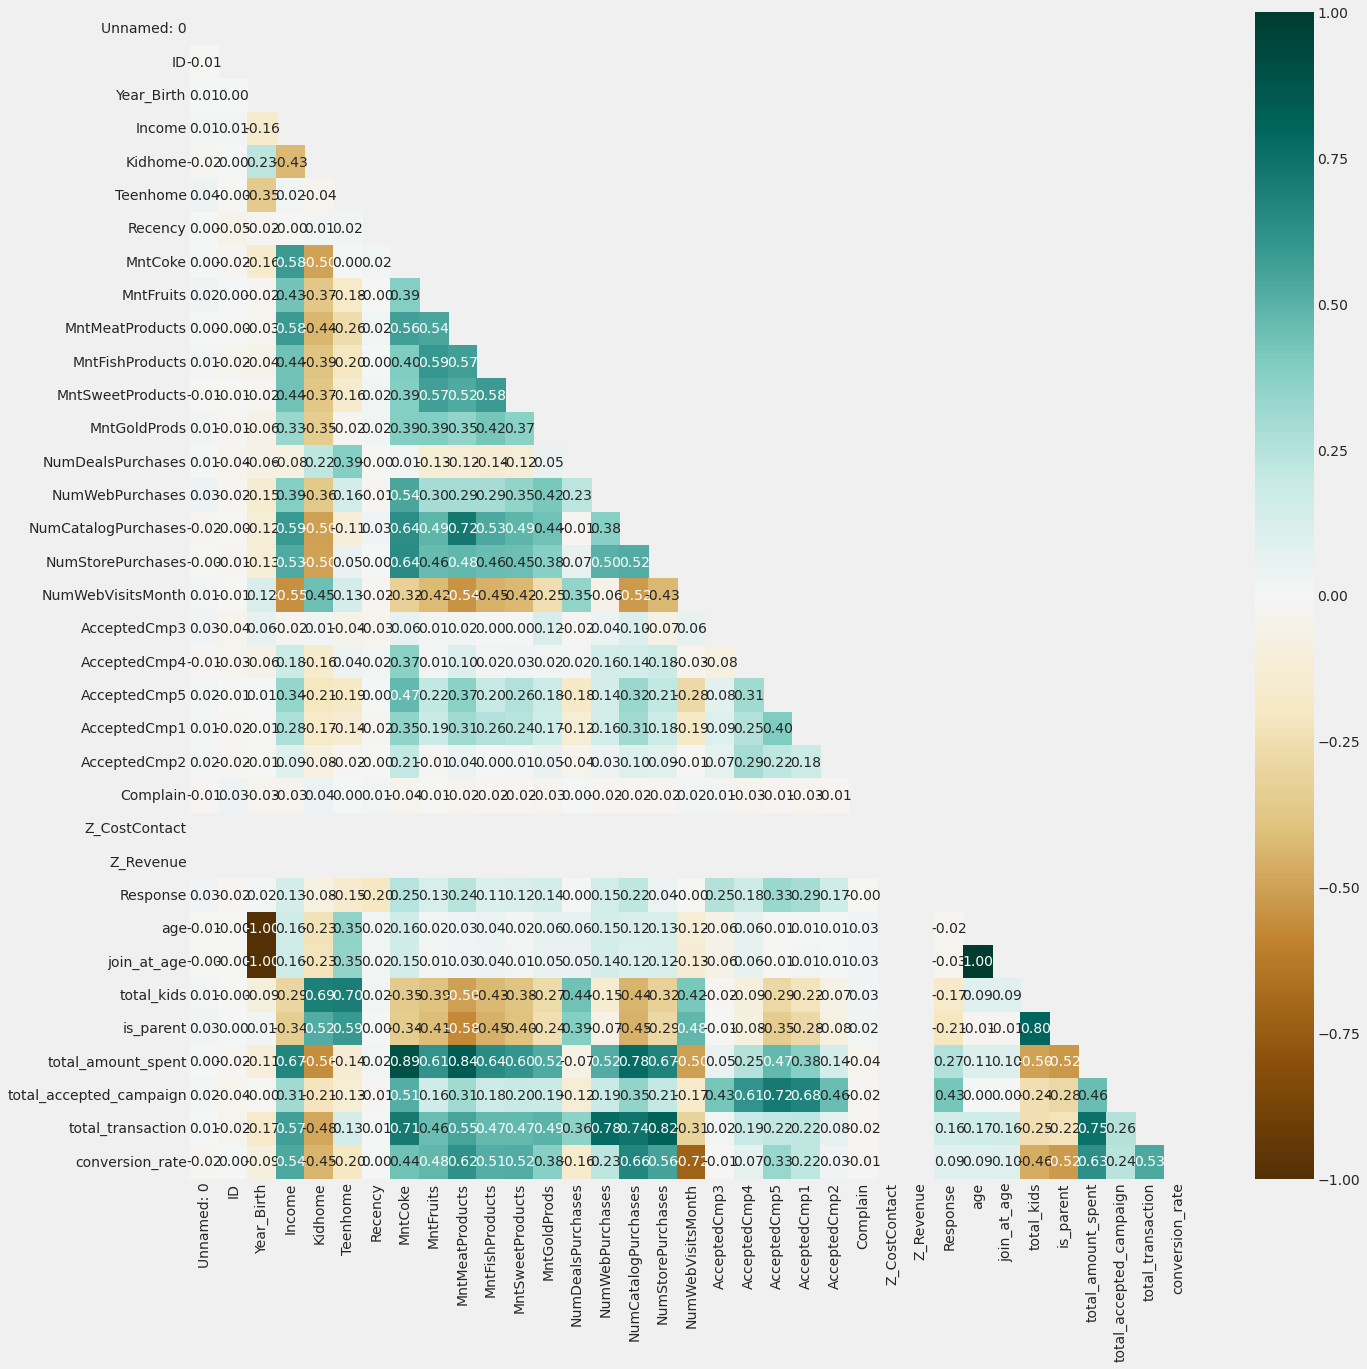

In [ ]:
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), cmap='BrBG', annot=True, vmin=-1, vmax=1, mask=mask, fmt='.2f')

### Income vs Spending

Text(0.5, 1.0, 'Income vs Total Spent')

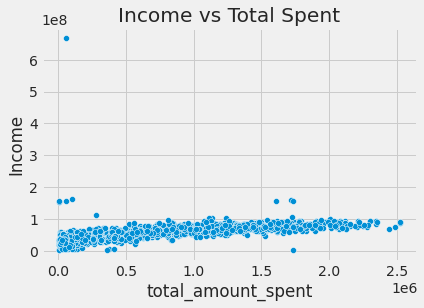

In [ ]:
sns.scatterplot(x=df['total_amount_spent'], y=df['Income'])
plt.title('Income vs Total Spent')

Text(0.5, 1.0, 'Income vs Conversion Rate')

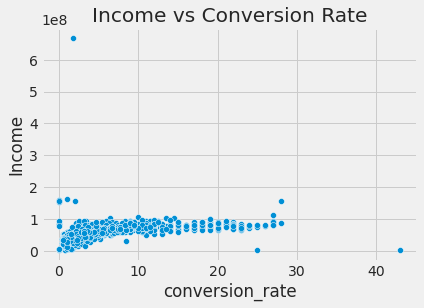

In [ ]:
sns.scatterplot(x=df['conversion_rate'], y=df['Income'])
plt.title('Income vs Conversion Rate')

## Age vs Spending & Income

Text(0.5, 1.0, 'Income vs Age')

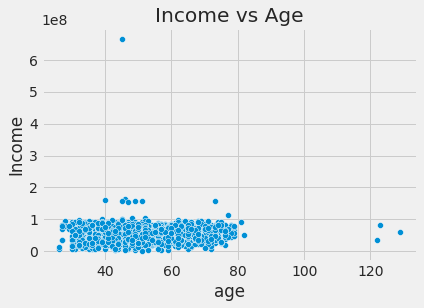

In [ ]:
sns.scatterplot(x=df['age'], y=df['Income'])
plt.title('Income vs Age')

Text(0.5, 1.0, 'Conversion Rate vs Age')

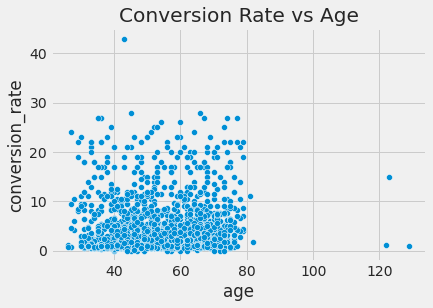

In [ ]:
sns.scatterplot(x=df['age'], y=df['conversion_rate'])
plt.title('Conversion Rate vs Age')

Text(0.5, 1.0, 'total_amount_spent vs age')

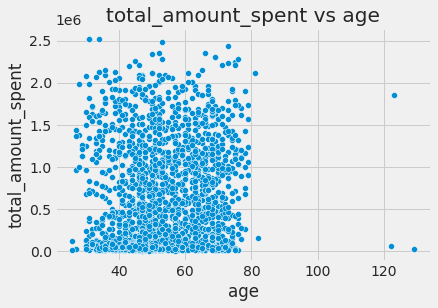

In [ ]:
sns.scatterplot(x=df['age'], y=df['total_amount_spent'])
plt.title('total_amount_spent vs age')

Text(0.5, 1.0, 'conversion rate vs total_amount_spent')

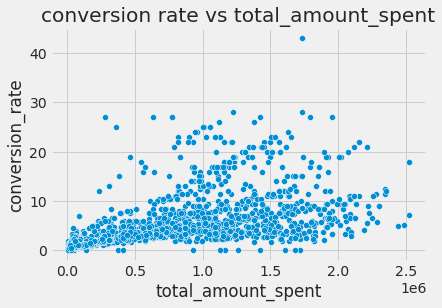

In [ ]:
sns.scatterplot(x=df['total_amount_spent'], y=df['conversion_rate'])
plt.title('conversion rate vs total_amount_spent')

# EDA: Conversion rate analysis based on income, spending and age

## Handling Missing Value

In [ ]:
df.isnull().sum().sort_values(ascending=False)*100/len(df)

Income                    1.07
Unnamed: 0                0.00
Response                  0.00
AcceptedCmp4              0.00
AcceptedCmp5              0.00
AcceptedCmp1              0.00
AcceptedCmp2              0.00
Complain                  0.00
Z_CostContact             0.00
Z_Revenue                 0.00
age                       0.00
NumWebVisitsMonth         0.00
join_at_age               0.00
total_kids                0.00
is_parent                 0.00
age_range                 0.00
total_amount_spent        0.00
total_accepted_campaign   0.00
total_transaction         0.00
AcceptedCmp3              0.00
NumStorePurchases         0.00
ID                        0.00
NumCatalogPurchases       0.00
Year_Birth                0.00
Education                 0.00
Marital_Status            0.00
Kidhome                   0.00
Teenhome                  0.00
Dt_Customer               0.00
Recency                   0.00
MntCoke                   0.00
MntFruits                 0.00
MntMeatP

karena nilai null pada kolom income < 4% maka akan didrop

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Unnamed: 0                 0
Response                   0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
age                        0
NumWebVisitsMonth          0
join_at_age                0
total_kids                 0
is_parent                  0
age_range                  0
total_amount_spent         0
total_accepted_campaign    0
total_transaction          0
AcceptedCmp3               0
NumStorePurchases          0
ID                         0
Recency                    0
Year_Birth                 0
Education                  0
Marital_Status             0
Income                     0
Kidhome                    0
Teenhome                   0
Dt_Customer                0
MntCoke                    0
NumCatalogPurchases        0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProduc

### Handling Duplicated

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(2216, 39)

## Data Preprocessing

### Feature Encoding

In [ ]:
for col in cats:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('-----'*10, '\n')

value counts of column Education
S1     1116
S3      481
S2      365
D3      200
SMA      54
Name: Education, dtype: int64
-------------------------------------------------- 

value counts of column Marital_Status
Menikah        857
Bertunangan    573
Lajang         475
Cerai          232
Janda           76
Duda             3
Name: Marital_Status, dtype: int64
-------------------------------------------------- 

value counts of column Dt_Customer
2012-08-31    12
2012-12-09    11
2013-02-14    11
2014-12-05    11
2013-08-20    10
              ..
2012-05-08     1
2012-11-18     1
2014-09-05     1
2013-06-26     1
2014-09-01     1
Name: Dt_Customer, Length: 662, dtype: int64
-------------------------------------------------- 

value counts of column age_range
child            472
young_adults     454
teens            441
middle_adults    430
older_adults     419
Name: age_range, dtype: int64
-------------------------------------------------- 



In [ ]:
# label encoder
mapping_education = {
    'SMA': 0,
    'D3': 1,
    'S1': 2,
    'S2': 3,
    'S3': 4
}

df['Education_mapped'] = df['Education'].map(mapping_education)
df['Education_mapped']

0       2
1       2
2       2
3       2
4       4
       ..
2235    2
2236    4
2237    2
2238    3
2239    4
Name: Education_mapped, Length: 2216, dtype: int64

In [ ]:
# One Hot Encoder
df_cats = df[['Education']].copy()
for cat in ['Marital_Status','age_range','is_parent']:
  onehots = pd.get_dummies(df[cat], prefix=cat)
  df_cats = df_cats.join(onehots)

In [ ]:
df_cats

,Education,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,age_range_child,age_range_teens,age_range_young_adults,age_range_middle_adults,age_range_older_adults,is_parent_0,is_parent_1
0,S1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,S1,0,0,0,0,1,0,0,0,0,0,1,0,1
2,S1,1,0,0,0,0,0,0,0,0,1,0,1,0
3,S1,1,0,0,0,0,0,1,0,0,0,0,0,1
4,S3,0,0,0,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,S1,0,0,0,0,0,1,0,0,1,0,0,0,1
2236,S3,1,0,0,0,0,0,0,0,0,0,1,0,1
2237,S1,0,1,0,0,0,0,1,0,0,0,0,1,0
2238,S2,1,0,0,0,0,0,0,0,0,0,1,0,1


### Feature Standarization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               2216 non-null   int64         
 1   ID                       2216 non-null   int64         
 2   Year_Birth               2216 non-null   int64         
 3   Education                2216 non-null   object        
 4   Marital_Status           2216 non-null   object        
 5   Income                   2216 non-null   float64       
 6   Kidhome                  2216 non-null   int64         
 7   Teenhome                 2216 non-null   int64         
 8   Dt_Customer              2216 non-null   datetime64[ns]
 9   Recency                  2216 non-null   int64         
 10  MntCoke                  2216 non-null   int64         
 11  MntFruits                2216 non-null   int64         
 12  MntMeatProducts          2216 non-

In [ ]:
from sklearn.preprocessing import StandardScaler
df_scaled = df.copy()
ss = StandardScaler()

for col in nums:
  df_scaled[col] = ss.fit_transform(df_scaled[[col]])

df_scaled

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,join_at_age,total_kids,is_parent,age_range,total_amount_spent,total_accepted_campaign,total_transaction,conversion_rate,Education_mapped
0,0,5524,-0.99,S1,Lajang,0.23,-0.82,-0.93,2012-04-09,0.31,0.98,1.55,1.69,2.45,1.48,0.85,0.35,1.43,2.50,-0.55,0.69,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,2.38,0.99,0.90,-1.26,-1.58,middle_adults,1.68,-0.44,1.32,-0.17,2
1,1,2174,-1.24,S1,Lajang,-0.23,1.04,0.91,2014-08-03,-0.38,-0.87,-0.64,-0.72,-0.65,-0.63,-0.73,-0.17,-1.13,-0.57,-1.17,-0.13,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,-0.42,1.24,1.31,1.41,0.63,older_adults,-0.96,-0.44,-1.16,-0.65,2
2,2,4141,-0.32,S1,Bertunangan,0.77,-0.82,-0.93,2013-08-21,-0.80,0.36,0.57,-0.18,1.34,-0.15,-0.04,-0.69,1.43,-0.23,1.29,-0.54,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,-0.42,0.32,0.32,-1.26,-1.58,middle_adults,0.28,-0.44,0.80,0.18,2
3,3,6182,1.27,S1,Bertunangan,-1.02,1.04,-0.93,2014-10-02,-0.80,-0.87,-0.56,-0.66,-0.50,-0.59,-0.75,-0.17,-0.76,-0.91,-0.55,0.28,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,-0.42,-1.27,-1.18,0.07,0.63,child,-0.92,-0.44,-0.90,-0.63,2
4,4,5324,1.02,S3,Menikah,0.24,1.04,-0.93,2014-01-19,1.55,-0.39,0.42,-0.22,0.15,-0.00,-0.56,1.39,0.33,0.11,0.06,-0.13,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,-0.42,-1.02,-0.93,0.07,0.63,child,-0.31,-0.44,0.54,-0.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,-0.15,S1,Menikah,0.36,-0.82,0.91,2013-06-13,-0.10,1.20,0.42,0.07,0.08,2.22,3.92,-0.17,1.79,0.11,-0.55,-0.13,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,-0.42,0.15,0.15,0.07,0.63,young_adults,1.22,-0.44,0.41,-0.16,2
2236,2236,4001,-1.90,S3,Bertunangan,0.47,2.90,0.91,2014-10-06,0.24,0.30,-0.66,-0.61,-0.69,-0.66,-0.69,2.43,1.43,-0.23,-0.25,0.69,-0.28,-0.28,-0.28,3.82,-0.12,-0.10,0.00,0.00,-0.42,1.90,1.98,2.74,0.63,older_adults,-0.27,1.03,0.93,-0.26,4
2237,2237,7270,1.02,S1,Cerai,0.19,-0.82,-0.93,2014-01-25,1.45,1.79,0.54,0.22,-0.10,-0.37,-0.39,-0.69,-0.76,0.11,2.22,0.28,-0.28,3.54,-0.28,-0.26,-0.12,-0.10,0.00,0.00,-0.42,-1.02,-0.93,-1.26,-1.58,child,1.05,1.03,0.54,-0.25,2
2238,2238,8235,-1.07,S2,Bertunangan,0.68,-0.82,0.91,2014-01-24,-1.42,0.36,0.09,0.21,0.77,0.07,0.33,-0.17,0.70,0.80,1.29,-0.96,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,-0.42,1.07,1.15,0.07,0.63,older_adults,0.39,-0.44,1.06,0.67,3


# Data Modelling : K-means Clustering

[229845588.6939085, 102426415.19977236, 57949165.348453805, 37030301.30980153, 25831994.145973776, 19000031.61978841, 14529107.183298409, 11552300.861309174, 9344610.618896313, 7734233.668180998, 6513141.243359352, 5522591.421529628, 4783258.682909608, 4177210.3744987003, 3674367.4670158597, 3286391.4266793695, 2931115.7100177733, 2649278.7224784843]


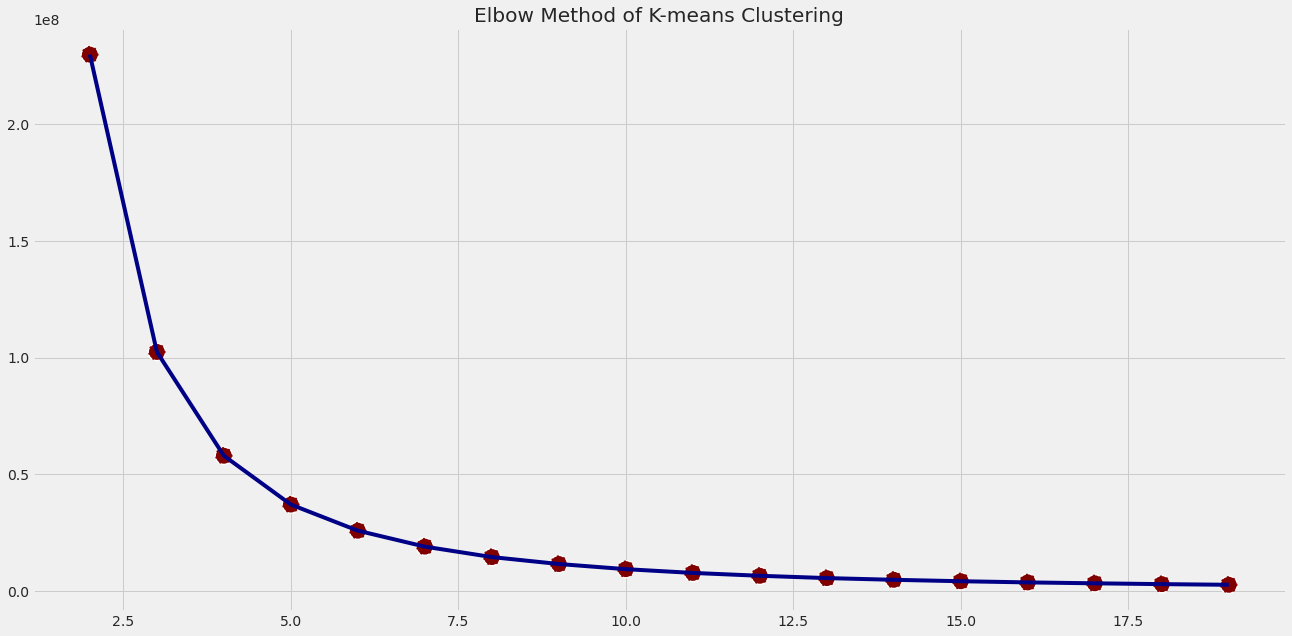

In [ ]:
from sklearn.cluster import KMeans
X = df_scaled.drop(columns=['ID', 'Year_Birth', 'Education', 'Marital_Status', 'age_range', 'Dt_Customer']).copy()
inertia = []

for i in range(2, 20):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X.values)
  inertia.append(kmeans.inertia_)

print(inertia)
plt.figure(figsize=(20,10))
plt.title('Elbow Method of K-means Clustering')

sns.lineplot(x=range(2,20), y=inertia, linewidth = 4, color='#000087')
sns.scatterplot(x=range(2,20), y=inertia, s=300, linestyle='--', color='#800000')

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X.values)
X['cluster'] = kmeans.labels_
df['cluster'] = kmeans.labels_

In [ ]:
X.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,join_at_age,total_kids,is_parent,total_amount_spent,total_accepted_campaign,total_transaction,conversion_rate,Education_mapped,cluster
0,0,0.23,-0.82,-0.93,0.31,0.98,1.55,1.69,2.45,1.48,0.85,0.35,1.43,2.50,-0.55,0.69,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,2.38,0.99,0.90,-1.26,-1.58,1.68,-0.44,1.32,-0.17,2,2
1,1,-0.23,1.04,0.91,-0.38,-0.87,-0.64,-0.72,-0.65,-0.63,-0.73,-0.17,-1.13,-0.57,-1.17,-0.13,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,-0.42,1.24,1.31,1.41,0.63,-0.96,-0.44,-1.16,-0.65,2,2
2,2,0.77,-0.82,-0.93,-0.80,0.36,0.57,-0.18,1.34,-0.15,-0.04,-0.69,1.43,-0.23,1.29,-0.54,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,-0.42,0.32,0.32,-1.26,-1.58,0.28,-0.44,0.80,0.18,2,2
3,3,-1.02,1.04,-0.93,-0.80,-0.87,-0.56,-0.66,-0.50,-0.59,-0.75,-0.17,-0.76,-0.91,-0.55,0.28,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,-0.42,-1.27,-1.18,0.07,0.63,-0.92,-0.44,-0.90,-0.63,2,2
4,4,0.24,1.04,-0.93,1.55,-0.39,0.42,-0.22,0.15,-0.00,-0.56,1.39,0.33,0.11,0.06,-0.13,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,-0.42,-1.02,-0.93,0.07,0.63,-0.31,-0.44,0.54,-0.12,4,2


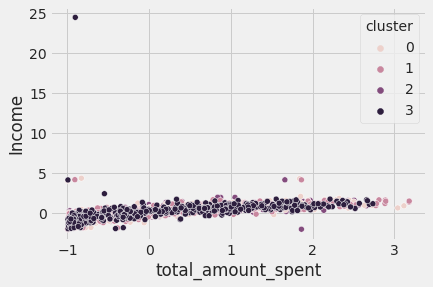

In [ ]:
sns.scatterplot(data=X, x='total_amount_spent', y='Income', hue='cluster')

## Eval: Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

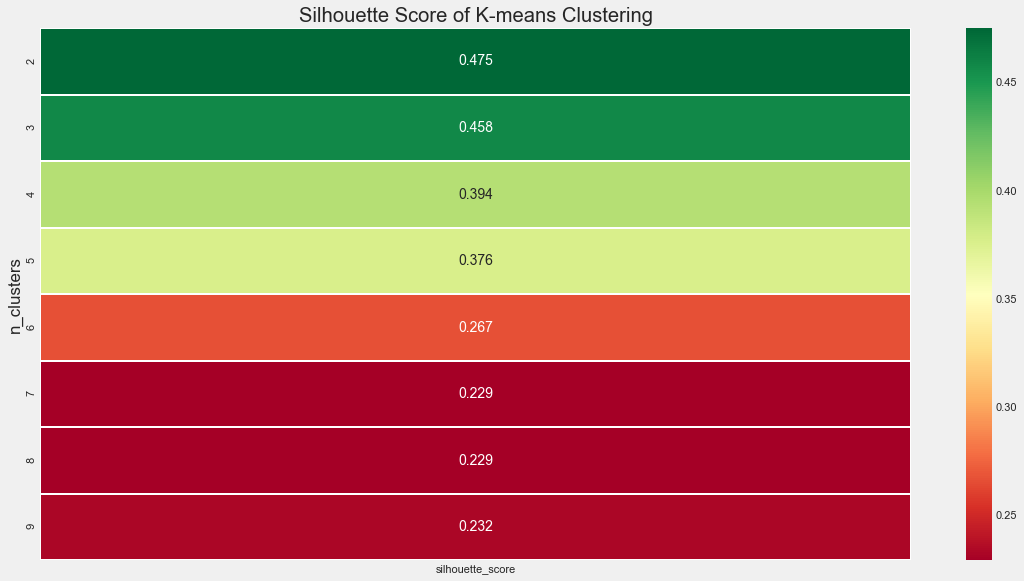

In [ ]:
visualize_silhouette_layer(X)

# Customer personality analysis for marketing retargeting

## Cluster Analysis & Interpretation

### Statistical Summary per Cluster

In [ ]:
numerical_features

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntCoke',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Z_CostContact',
 'Z_Revenue',
 'age',
 'join_at_age',
 'total_kids',
 'total_amount_spent']

In [ ]:
df[numerical_features+['cluster']].groupby('cluster')['Income','total_amount_spent'].describe()

Income                                                                 \
         count          mean           std        min         25%         50%   
cluster                                                                         
0        600.0  5.915598e+07  2.907067e+07  1730000.0  47159000.0  57313000.0   
1        915.0  3.376977e+07  1.430822e+07  3502000.0  24736500.0  33402000.0   
2        564.0  6.846531e+07  1.320797e+07  7144000.0  60407500.0  68117500.0   
3        137.0  7.863174e+07  1.416946e+07  2447000.0  72679000.0  80124000.0   

                                 total_amount_spent                \
                75%          max              count          mean   
cluster                                                             
0        68722500.0  666666000.0              600.0  7.172950e+05   
1        41020500.0  162397000.0              915.0  7.612787e+04   
2        76738500.0  160803000.0              564.0  1.185512e+06   
3        83829000.0  157146000.0              137.0  1.289168e+06   

                                                                             
                   std       min       25%        50%        75%        max  
cluster                                                                      
0        493792.719730    8000.0  346000.0   506000.0  1035250.0  2302000.0  
1         71647.141976    5000.0   36000.0    57000.0    96000.0  1376000.0  
2        444518.680991  415000.0  833500.0  1110500.0  1486250.0  2524000.0  
3        432624.303275  277000.0  988000.0  1216000.0  1574000.0  2525000.0

In [ ]:
map_cluster = {
    0 : 'Low Spender',
    1 : 'Risk of Churn',
    2 : 'Mid Spender',
    3 : 'High Spender'
}

df['cluster_mapped'] = df['cluster'].map(map_cluster)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Mid Spender'),
  Text(1, 0, 'Risk of Churn'),
  Text(2, 0, 'Low Spender'),
  Text(3, 0, 'High Spender')])

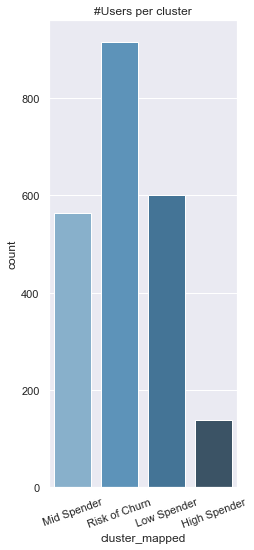

In [ ]:
sns.set(rc={'figure.figsize':(3,8)})
sns.countplot(x=df['cluster_mapped'], palette='Blues_d')
plt.title('#Users per cluster')
plt.xticks(rotation=20)

(0.0, 120000000.0)

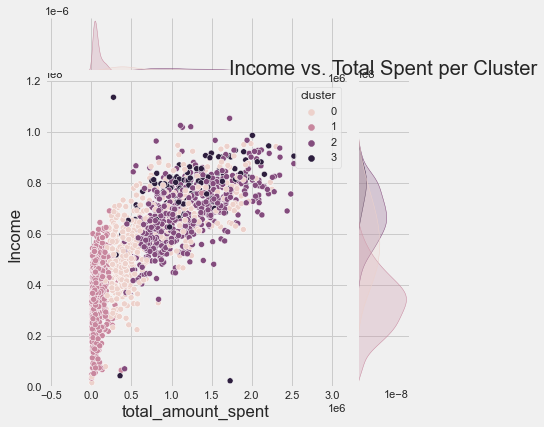

In [ ]:
plot = sns.jointplot(x=df["total_amount_spent"], y=df["Income"], hue=df["cluster"])
plt.title('Income vs. Total Spent per Cluster')
plot.ax_marg_y.set_ylim(0, 120000000)

### Total Income per Cluster

(0.0, 120000000.0)

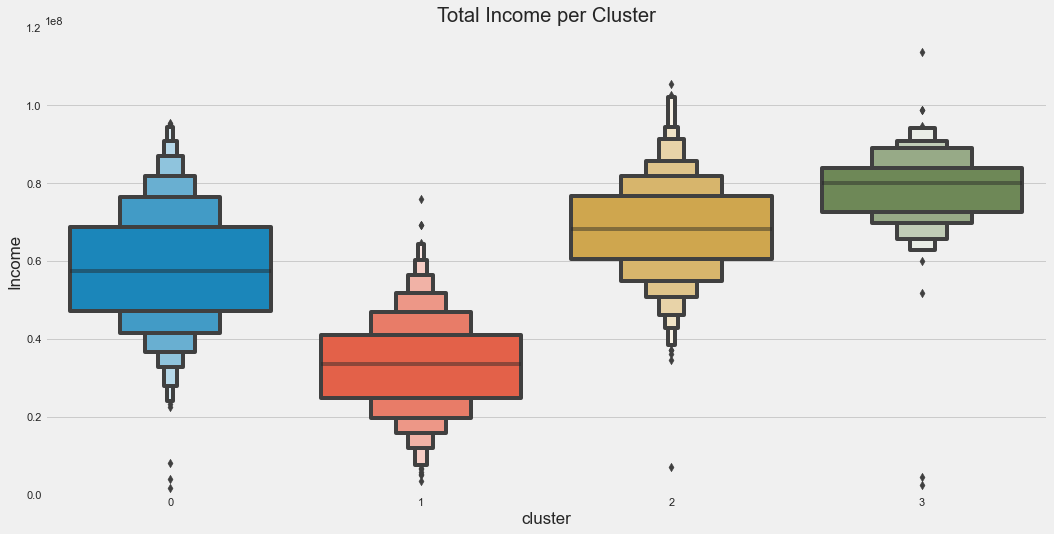

In [ ]:
sns.boxenplot(x=df['cluster'], y=df['Income'])
plt.title('Total Income per Cluster')
plt.ylim(0, 120000000)

### Total Spending per Cluster

Text(0.5, 1.0, 'Total Amount Spent per Cluster')

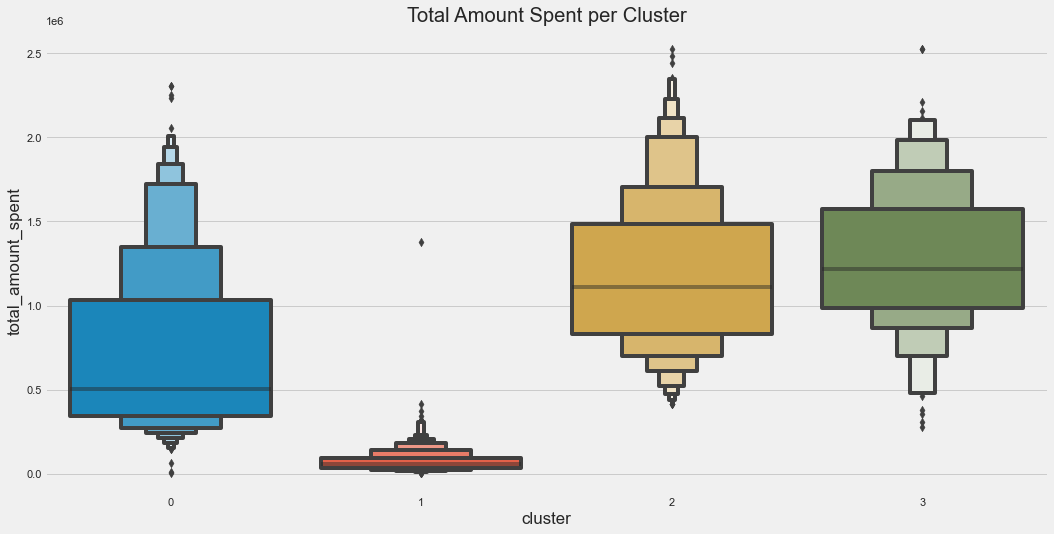

In [ ]:
sns.boxenplot(x=df['cluster'], y=df['total_amount_spent'])
plt.title('Total Amount Spent per Cluster')

Cluster 1 and 2 spent the highest respectively

### Total Visits per Cluster

Text(0.5, 1.0, 'Total Visit Web per Cluster')

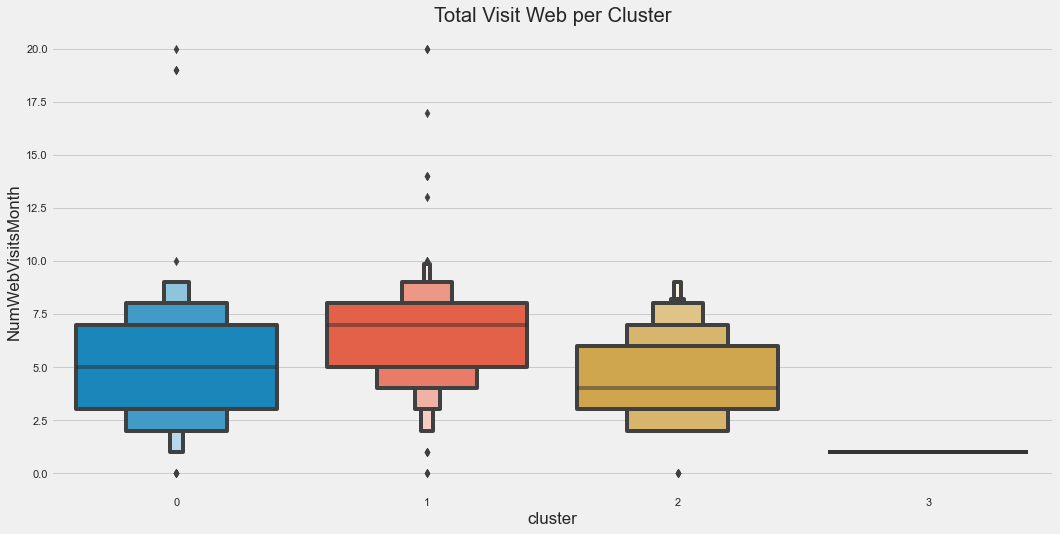

In [ ]:
sns.boxenplot(x=df['cluster'], y=df['NumWebVisitsMonth'])
plt.title('Total Visit Web per Cluster')

### Deal Puchased per Cluster

Text(0.5, 1.0, 'Deal Puchased per Cluster')

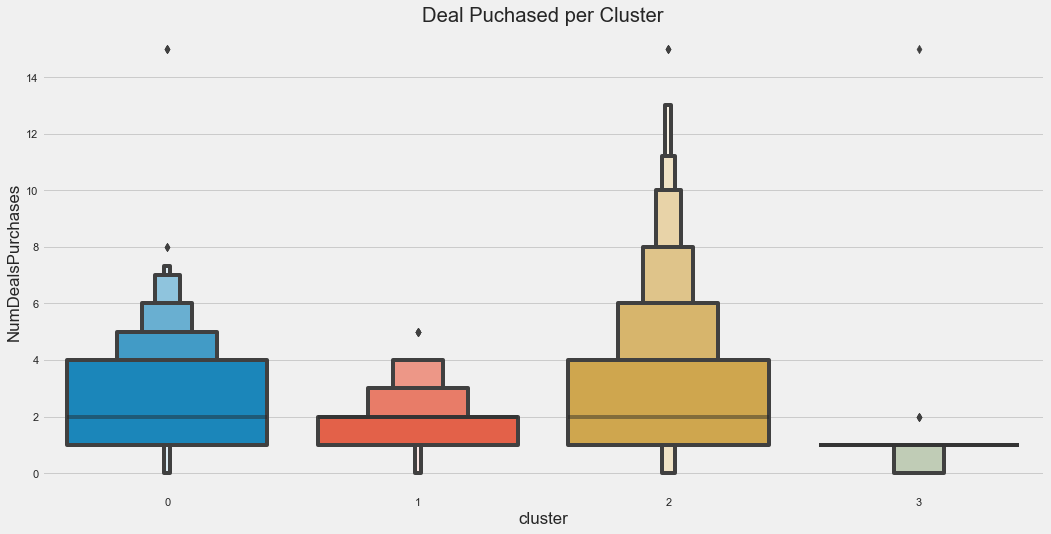

In [ ]:
sns.boxenplot(x=df['cluster'], y=df['NumDealsPurchases'])
plt.title('Deal Puchased per Cluster')

### Conversion per Cluster

Text(0.5, 1.0, 'CVR per Cluster')

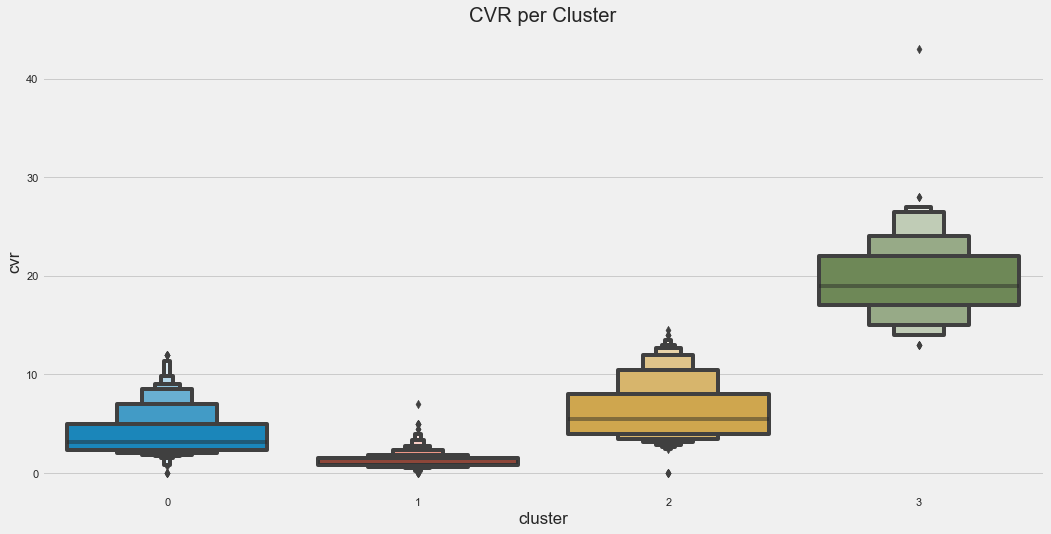

In [ ]:
sns.boxenplot(x=df['cluster'], y=df['conversion_rate'])
plt.title('CVR per Cluster')

## Interpretation Cluster Summary

1. Low Spender:
- This group is dominated by older_adults (> 55 years) and middle_aged_adults (36-55 years), who are predominantly married and have 1 child
- This group visits the website quite often, second most frequently after Cluster 1, with a median of 5 times a month, however, this group quite often looks for promos where each person buys promos 2 times a month (median)
- However, this group has the second smallest total income and expenditure compared to the other groups, which are IDR 57 Million for total annual income, and IDR 506K for annual expenditure respectively


2. Risk of Churn:
- This group is the group with the largest number of users of 900 people, dominated by middle_aged_adults (36-55 years), who are predominantly married and have 1 child.
- In terms of income and expenses, this group has the smallest income and expenses each month, which is IDR 33.4 Million each for a year's total income, and IDR 57K for a year's expenses
- Even so, this group is the group that visits the web the most with a median total visit of 7 times a month, however, they still rarely make transactions and even use promos on their transactions
- Not many respond in campaign compared to other groups. They come organically


3. Mid Spender:
- This group is dominated by older_adults (> 55 years) and middle_aged_adults (36-55 years), who are predominantly married and have 0-1 children
- this group has the second largest total income and expenditure compared to the other groups, which are IDR 68 million for total annual income, and IDR 1.1 million for annual expenditure respectively
- Even though it's quite rare to visit the web, this group is the group that most often responds to our campaigns and uses promos the most in a month with an average of using promos 3 times a month


4. High Spender:
- This group is the group with the smallest number of users of 137 people, dominated by older_adults (> 55 years) and middle_aged_adults (36-55 years), who are dominantly single/not married and do not have children
- In terms of income and expenses, this group has the most income and expenses each month, which are IDR 80 million each for a year's total income, and IDR 1.2 million for a year's expenses
- This cluster is pretty much non-organic by responding to campaigns, but has the least amount of promo usage compared to the others.
- This group is the group that has the biggest conversion rate to buy our products, and we shouldn't lose them.

## Recommendation & Potential Impact

Recommendation:
1. Continue to monitor transactions and retention from the High Spender group, focus on improving service so that this group does not churn
2. For the Mid Spender group, further analysis can be carried out on how to increase transactions by providing more personal recommendations, as well as deeper analysis of how to optimize promos in this segment and keep shopping on our platform
3. For the Low Spender and Risk to Churn groups, further analysis can also be carried out on how to increase the visit to transaction conversion ratio. They have a fairly high number of visits but do not make transactions. This can be caused by products or prices that do not match.

Potential Impact:
- If we focus on continuing to monitor the High Spender group, we will still get a potential GMV of IDR 176 million, while for the Mid Spender group it is IDR 66 million
- If we can optimize the promo spent for the Mid Spender (assuming a 50% reduction), we can reduce the cost by IDR 50 Million

In [ ]:
df[df.cluster == 3].total_amount_spent.sum()

176616000

In [ ]:
df[df.cluster == 3].total_amount_spent.sum() / df[df.cluster == 3].total_transaction.sum()

66372.04058624577

In [ ]:
df[df.cluster == 2].total_amount_spent.sum()

668629000

In [ ]:
df[df.cluster == 2].total_amount_spent.sum() / df[df.cluster == 2].total_transaction.sum()

48304.363531281604

In [ ]:
# jumlah yang dapat di save jika dapat optimasi promo cost (asumsi: target reduce 50%)
(df[df.cluster == 2].total_amount_spent.sum() / df[df.cluster == 2].total_transaction.sum()) * df[df.cluster == 2].NumDealsPurchases.sum()

81151330.7325531

In [ ]:
81151330*0.5

40575665.0